## K-means

首先进行非常简单的聚类，没有任何目的的那种

c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:14

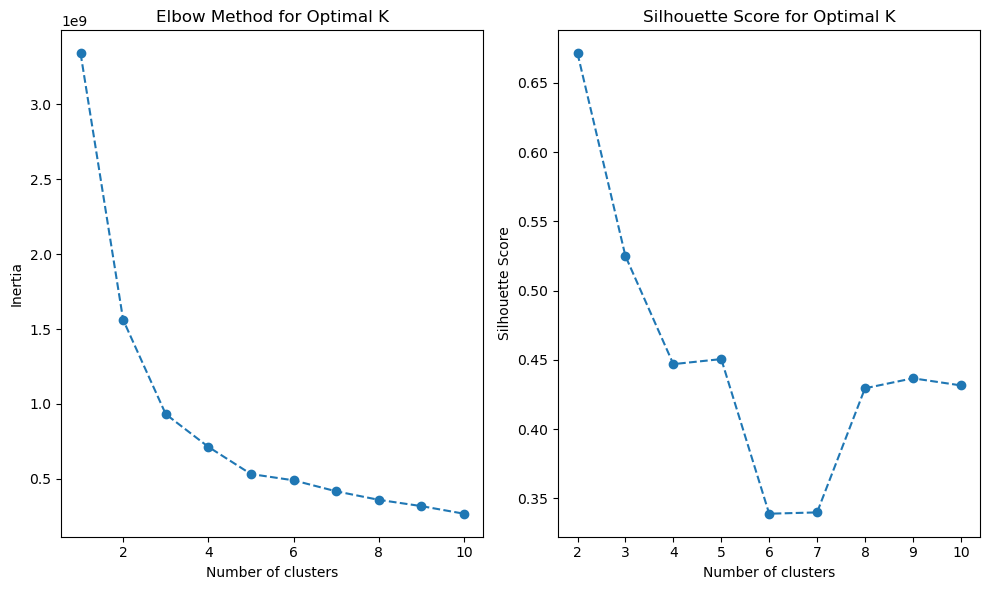

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimal_kmeans(X, max_k=10):
    """
    使用肘部法则和轮廓系数法来选择最佳的类数。

    参数:
        X (ndarray or DataFrame): 输入特征数据。
        max_k (int): 最大聚类数。

    返回:
        None
    """
    inertia = []  # 簇内误差平方和
    silhouette_scores = []  # 轮廓系数

    # 计算不同类数下的聚类结果
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        
        inertia.append(kmeans.inertia_)  # 记录簇内误差平方和
        if k > 1:  # 轮廓系数要求类数大于1
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # 绘制肘部法则图
    plt.figure(figsize=(10, 6))

    # 绘制簇内误差平方和 (Elbow Method)
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_k + 1), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

    # 绘制轮廓系数图
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# 使用函数
optimal_kmeans(X)  # 其中 X 是你处理好的数据


希望将公司分为几类，那么要专门提出公司数据

In [35]:
company_feature = ["年报资产报酬率（%）","年报资产报酬率TTM（%）","年报营业利润率（%）","年报总资产周转率（次）","年报总资产周转率TTM（次）","年报非流动资产/总资产（%）"]

X_company ,_ = select_features_and_label(data, company_feature, label_column)
X_company = preprocess_data(X_company, company_feature)


特征和标签选择成功！
指定数值特征标准化完成！


c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:14

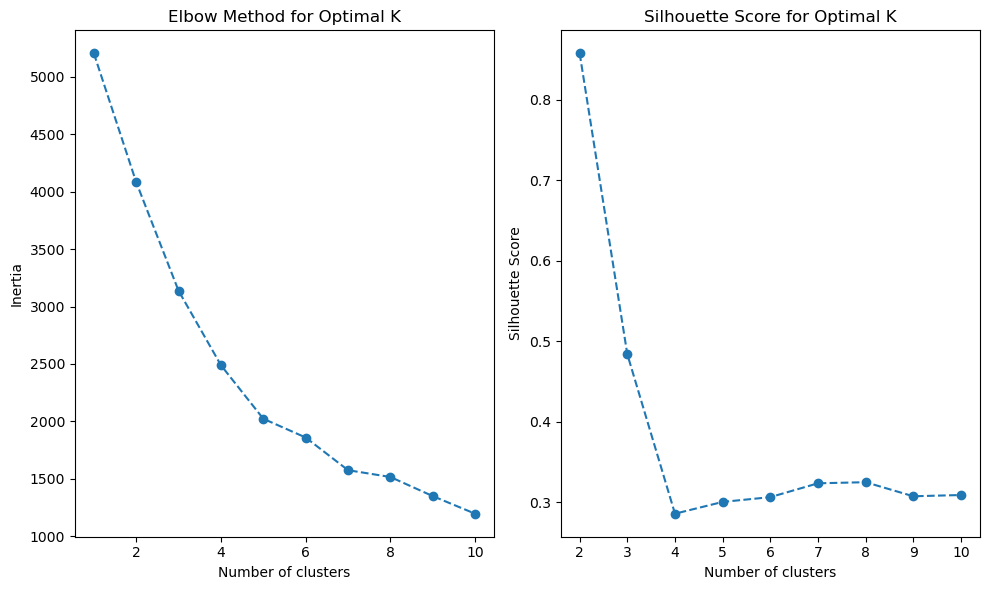

In [9]:
optimal_kmeans(X_company)

显然，公司应当分为四类

把结果替换现有的基本面数据

In [17]:
# 定义最佳的簇数 (n_clusters)
best_n_clusters = 4  # 这里用3类举例，根据你之前得到的最佳结果替换

# 初始化 K-means 模型
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)

# 训练模型并获取簇标签
X['公司基本面类别'] = kmeans.fit_predict(X)
X = X.loc[:, ["公司基本面类别", "原文长度", "情感分数", "新闻内容中性分数", "发布时间"]]
X

c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,公司基本面类别,原文长度,情感分数,新闻内容中性分数,发布时间
0,0,865,41.46,0.999901,0
1,0,317,4.00,0.999913,2
2,0,217,6.00,0.999914,2
3,0,358,19.60,0.000000,5
4,0,261,17.00,0.999891,6
...,...,...,...,...,...
862,3,344,0.00,0.999912,2800
863,1,7456,-5.86,0.933235,2800
864,3,1681,19.90,0.999725,2810
865,3,1729,-47.60,0.999907,2811


In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def kmeans_for_k4(X):
    """
    获取K=4时的聚类结果信息，包括簇类中心、簇标签、簇的大小、簇内误差平方和、轮廓系数等。
    """
    k = 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # 获取簇类中心（均值）
    centroids = kmeans.cluster_centers_
    print("K=4 时的簇类中心（均值）:")
    print(centroids)
    print()

    # 获取每个数据点的簇标签
    labels = kmeans.labels_

    # 获取每个簇的大小
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    print("K=4 时每个簇的大小:")
    print(cluster_sizes)
    print()

    # 获取簇内误差平方和
    inertia = kmeans.inertia_
    print("K=4 时的簇内误差平方和:")
    print(inertia)
    print()

    # 获取轮廓系数
    sil_score = silhouette_score(X, labels)
    print(f"K=4 时的轮廓系数: {sil_score}")

# 使用函数
kmeans_for_k4(X)  # 其中 X 是你处理好的数据


K=4 时的簇类中心（均值）:
[[-6.29805906e-02  1.26136094e-01  7.71524693e-02  2.43229412e-02
  -5.60796105e-03  8.93688752e-02  7.82816808e-02 -2.38785728e-02
  -1.28608063e-01  1.42597800e-01 -5.75302913e-02  3.44370861e-01
   2.74055424e-02  3.06622517e+00 -3.22689198e-01]
 [ 1.09359554e-01 -8.60309681e-02 -4.83243540e-02 -3.99641796e-02
   5.19011382e-02  7.70807683e-02  7.25143354e-02  4.20190798e-02
   1.38436288e-01 -1.85752543e-01  9.76158918e-02  3.69426752e-01
  -2.73335638e-02  2.47579618e+01  3.78519604e-01]
 [ 1.23270217e-01 -1.86785187e-02 -3.56851899e-02  3.77183426e-03
  -3.32842446e-02 -1.51062748e-01 -1.42035235e-01  1.68364350e-02
   2.72189905e-02 -2.26766607e-02  2.43717018e-02  2.67100977e-01
  -2.09770293e-02  1.00521173e+01 -1.87623264e-01]
 [-3.56368993e-01 -1.86652804e-01 -4.71066221e-02 -2.20703483e-02
   3.72612736e-02  7.21305224e-02  8.49405817e-02 -4.50935848e-02
   8.66228493e-02 -6.87094209e-02 -5.37986089e-02  3.76237624e-01
   2.43053833e-02  3.94752475e+01  9.46

c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
